# Clustering

## Introduction
- Supervised learning: we have an output or label to try to fit
    - regression, classification
- Unsupervised learning
    - Clustering, PCA, MDS, SNE
    PCA is linear modle, MDS SNE is used to divived into two
- **Clustering** is another often unsupervised learning method
- Purpose: identify groups of data items that are similar


If you have simliarty matrix, you can use MDS and SNE into two dimensional matrix

- In PCA/MDS etc, we have relied on visualization to find structure
    - e.g., we check that similar items, such as cereals with high fibers, are indeed closeby in the embedding, but far from unsimilar items such as rice crisps
    - visually similar items may form a group
- In clustering, instead of visually identify groups, we want to find them **automatically**, using algorithms
    - we do not want to project to lower dimension then do clustering, because embedding lose information
    

## What is clustering?

- **grouping** data items such that items in the same group are more **similar** to each other than to those in other groups 
- items in the same group form a **cluster**

- e.g., based on the data from the left, most people would think that that there are 4 clusters
- Why? Because perceptual "similarity"

<img width="180px" src="http://fengmai.net/download/data/bia652/images/cluster_bw.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"></img><img width="180px" src="http://fengmai.net/download/data/bia652/images/cluster_c.png" style="float: right; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">

## Similarity ##
- **similar** is defined in some sense 
- Similarity may be subjective
- Often, similarity is defined by a distance metric
- Euclidean distance: 

$$||\{x_1,x_2,x_3,\ldots, x_n\} - \{y_1,y_2,y_3,\ldots, y_n\}||_2 = \sqrt{(x_1-y_1)^2+(x_2-y_2)^2+\ldots+(x_n-y_n)^2}$$

If n>8, the Euclidean distance is not bood

- Or more generally, Minkowski distance
$$\left\|\{x_1,x_2,x_3,\ldots, x_n\} - \{y_1,y_2,y_3,\ldots, y_n\}\right\|_p = \left(|x_1-y_1|^p+|x_2-y_2|^p+\ldots+|x_n-y_n|^p\right)^{1/p}$$
- $p=1$ gives the Manhattan distance
$$\left\|\{x_1,x_2,x_3,\ldots, x_n\} - \{y_1,y_2,y_3,\ldots, y_n\}\right\|_1 = |x_1-y_1|+|x_2-y_2|+\ldots+|x_n-y_n|$$
- $p=\infty$ gives
$$\left\|\{x_1,x_2,x_3,\ldots, x_n\} - \{y_1,y_2,y_3,\ldots, y_n\}\right\|_\infty = \max\{|x_1-y_1|, |x_2-y_2|, \ldots, |x_n-y_n|\}$$

In [2]:
import math
math.sqrt(100*(0.1**2))

1.0

## Types of clustering
- exclusive/non-overlapping clustering
    - each data item only belongs to 1 cluster 
- overlapping clustering
    - a data item may belong to more than 1 cluster

## Types of clustering methods
- Hierarchical Clustering
    - Divisive (top down): e.g., spectral clustering
    - Agglomerative (bottom up): e.g., single linkage clustering, complex linkage clustering
- Centroid-based clustering
    - data items belongs to the closest center. Example: k-mean

- Distribution-based (overlapping) clustering
    - Based on statistical model
    - E.g., Gaussian mixture model
- Density-based clustering
    - clusters are defined as areas of higher density than the remainder of the data set. 
    - e.g., DBSCAN

## Hierarchical clustering: agglomerative method 


- The agglomerative method works bottom up
- Every data item is assumes to be in its own cluster
- At every step, choose two clusters that are **closest** and merge into a cluster

- Example:

<img src="http://fengmai.net/download/data/bia652/images/cluster_agg1.png" style="float: left; width: 45%; margin-right: 1%; margin-bottom: 0.5em;"></img>
<img src="http://fengmai.net/download/data/bia652/images/cluster_agg2.png" style="float: right; width: 45%; margin-right: 1%; margin-bottom: 0.5em;"></img>

**dendrogram**

- Need to define the distance between two clusters

- *Complete-linkage clustering*: maximum distance between elements of each cluster
    
$$ \text{dist}(A, B) = \max_{x\in A, y \in B}\ d(x,y) $$
<img src="http://fengmai.net/download/data/bia652/images/cluster_dists.png" style="float: right; width: 40%">


- *Single-linkage clustering*: minimum distance between elements of each cluster

$$ \text{dist}(A, B) = \min_{x\in A, y \in B}\ d(x,y) $$

- *Average linkage clustering*: mean distance between elements of each cluster
$$ \text{dist}(A, B) = \frac{1}{|A||B|}\sum_{x\in A,\ y \in B}\ d(x,y) $$

- *Centroid linkage clustering*: distance between cluster is that between centroids
$$ \text{dist}(A, B) = d(\mu(A),\mu(B)) $$

- *Ward linkage clustering*: distance between cluster is the variance of the union
**if cluster siez is equal, use this one**
$$ \text{dist}(A, B) = \sigma^2(A\cup B) $$

- Difference: single linkage can give long chains as "clusters"
- The other linkages all tends to avoid that
- Example: consider applying single vs complete linkage to the following

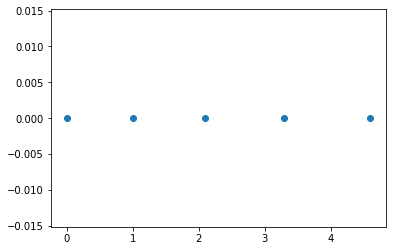

In [5]:
plt.scatter([0,1,2.1,3.3,4.6],[0,0,0,0,0])

- Using Python ```sklearn``` package ```cluster```
- ```cluster.AgglomerativeClustering``` only allows ward, average, complete linkage, not single linkage

In [4]:
from sklearn import cluster
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

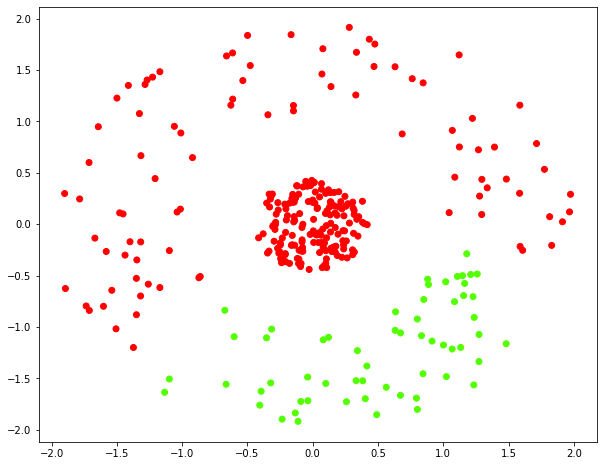

In [6]:
ring = pd.read_csv("http://fengmai.net/download/data/bia652/images/clustering_example1.csv",header=None).values
# cluster.AgglomerativeClustering only allows ward, average, complete linkage
ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_ward = ward.fit_predict(ring)
plt.figure(figsize=(10, 8))
plt.scatter(ring[:,0], ring[:,1], c=cluster_ward, cmap='prism')  # plot points with cluster dependent colors
plt.show()

- to get single linkage clustering


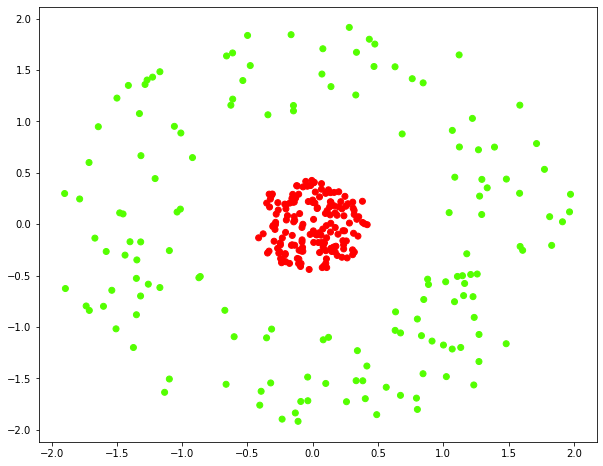

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(ring, 'single')
n_clusters = 2
clusters_single = fcluster(Z, n_clusters, criterion='maxclust')
plt.figure(figsize=(10, 8))
plt.scatter(ring[:,0], ring[:,1], c=clusters_single, cmap='prism')  # plot points with cluster dependent colors
plt.show()

- Applied to cereal data

In [8]:
cereal = pd.read_csv("http://fengmai.net/download/data/bia652/images/cereal.csv", sep=" ")
names = cereal["name"].values
cereal = cereal.drop(["name","mfr","type"],1)
cereal[:6] # we can see that there are missing values! (-1)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
5,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


- Stanardize and replace missing values

In [9]:
from sklearn.preprocessing import StandardScaler
cereal2 = StandardScaler(with_std=True).fit_transform(cereal) #standardize
for vals in cereal.columns:
    c = cereal[vals]
    avg = np.mean(c[c != -1])
    cereal[vals] = c.replace(-1, avg)

- Visualize

In [10]:
#manifold MDS/ maniford learning
from sklearn import manifold
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=123,
                   dissimilarity="euclidean", n_jobs=1)
cereal_mds2 = mds.fit(cereal2).embedding_


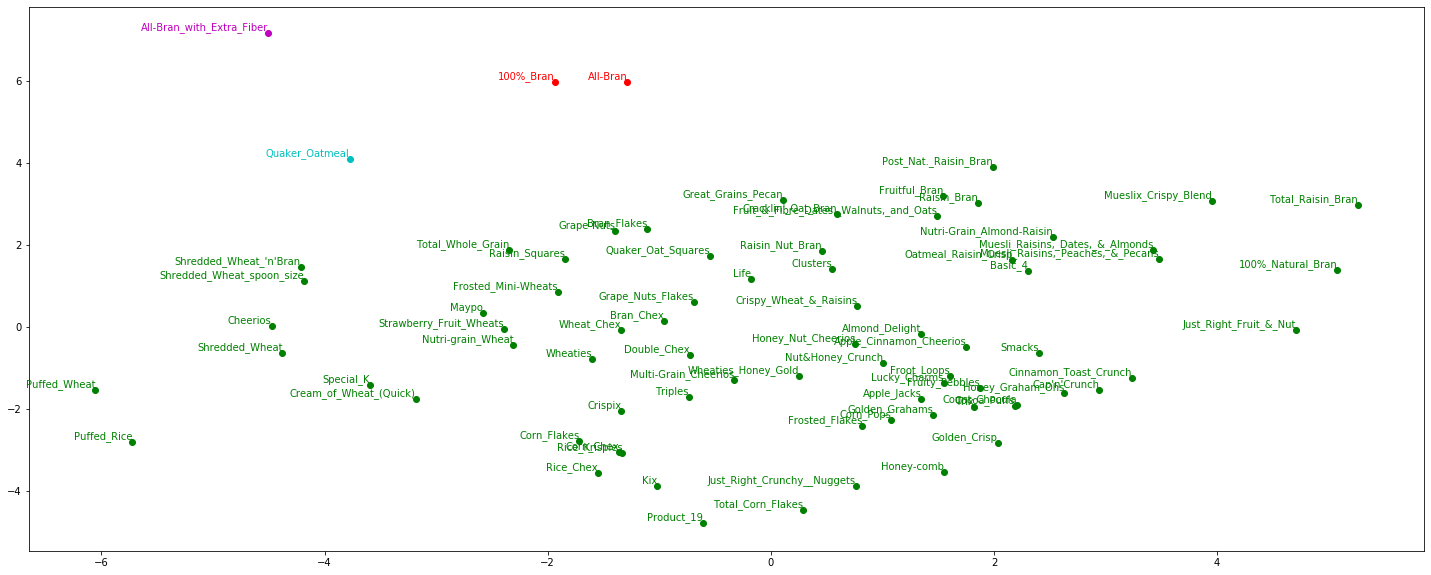

In [11]:
Z = linkage(cereal_mds2, 'single')
n_clusters = 4
cluster_single = fcluster(Z, n_clusters, criterion='maxclust')
# colors
colors = np.array([x for x in 'bgrcmyk'])
color = colors[cluster_single]
#scatter plot
plt.figure(figsize=(25, 10))
for x, y, c in zip(cereal_mds2[:,0], cereal_mds2[:,1], color):
    plt.scatter(x,y,color=c)
#labels
for label, x, y, c in zip(names, cereal_mds2[:,0],cereal_mds2[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

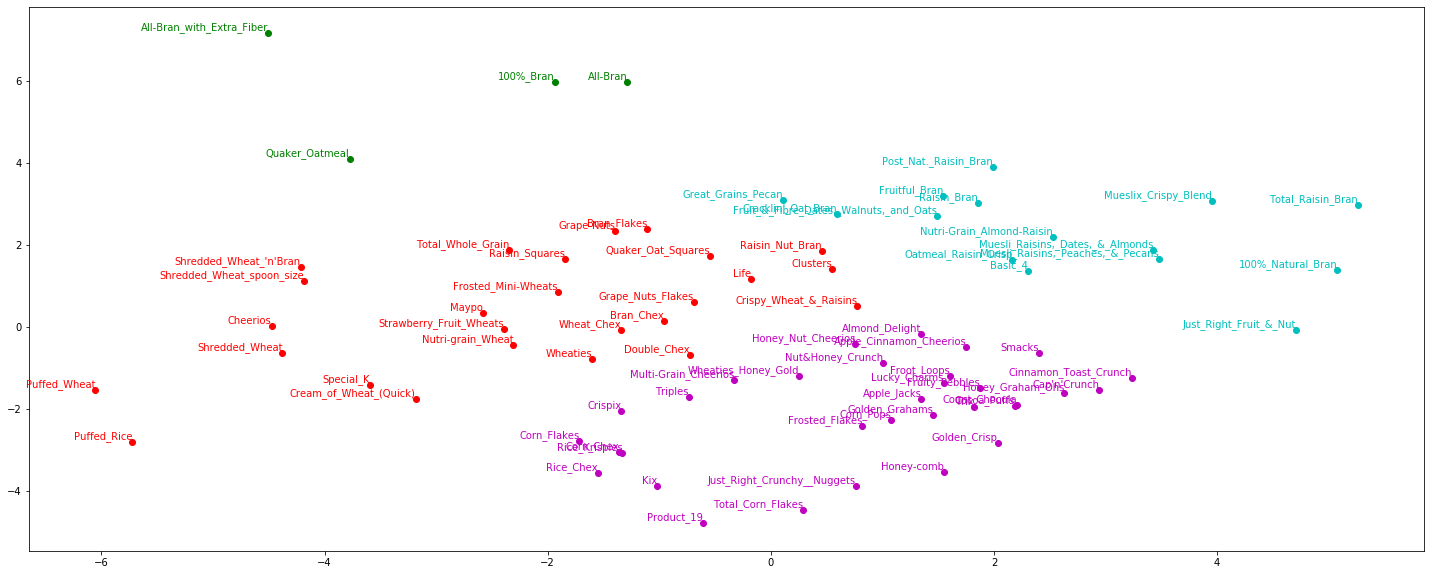

In [12]:
#ward will split it into equl part 
Z = linkage(cereal_mds2, 'ward')
n_clusters = 4
cluster_single = fcluster(Z, n_clusters, criterion='maxclust')
# colors
colors = np.array([x for x in 'bgrcmyk'])
color = colors[cluster_single]
#scatter plot
plt.figure(figsize=(25, 10))
for x, y, c in zip(cereal_mds2[:,0], cereal_mds2[:,1], color):
    plt.scatter(x,y,color=c)
#labels
for label, x, y, c in zip(names, cereal_mds2[:,0],cereal_mds2[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

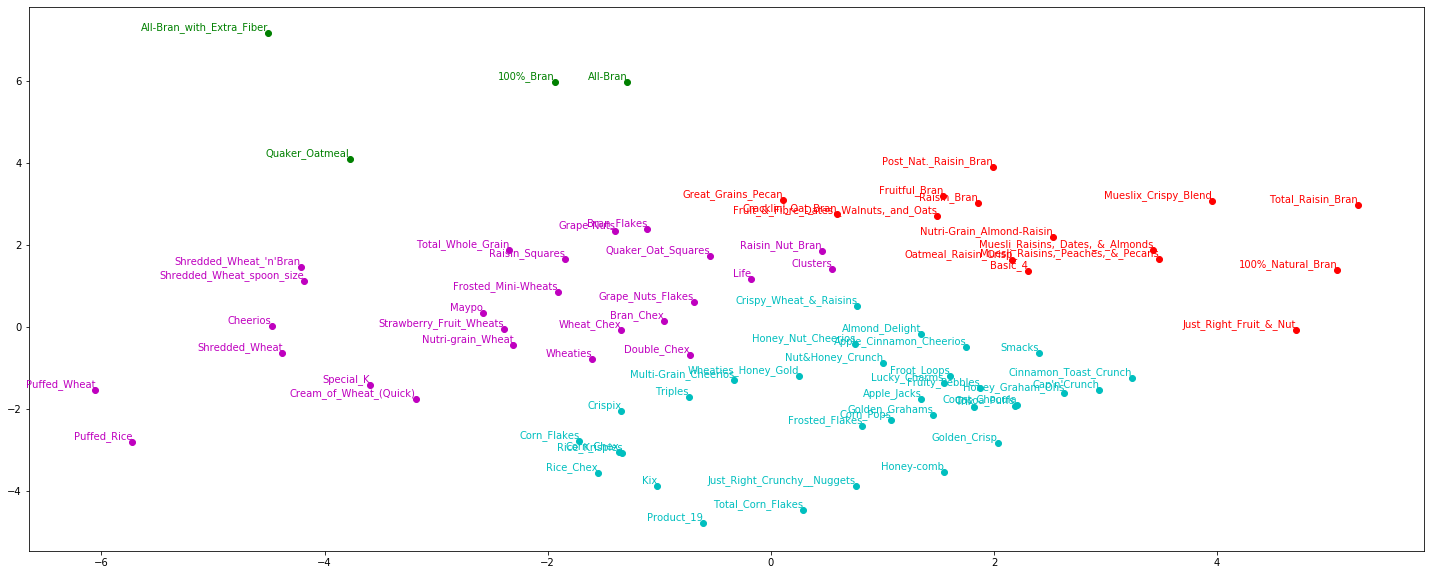

In [13]:
Z = linkage(cereal_mds2, 'average')
n_clusters = 4
cluster_single = fcluster(Z, n_clusters, criterion='maxclust')
# colors
colors = np.array([x for x in 'bgrcmyk'])
color = colors[cluster_single]
#scatter plot
plt.figure(figsize=(25, 10))
for x, y, c in zip(cereal_mds2[:,0], cereal_mds2[:,1], color):
    plt.scatter(x,y,color=c)
#labels
for label, x, y, c in zip(names, cereal_mds2[:,0],cereal_mds2[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

- Try "complete", "ward" and "average"!

## Centroid-based clustering: k-mean clustering


- k-means partitions data items into $k$ clusters
- It minimize the within-cluster sum of squares to the centers
$$\arg\min_{s}\sum_{i=1}^k \sum_{x\in S_i}\|x - \mu_i\|^2$$
- Where $\mu_i$ is the mean of the data items in cluster $s_i$ and $S$ is the $k$ clustering

-  **Lloyd's algorithm**
- Initialization: set $k$-centers $\mu_j$
- Assignment step: assign each data item to the closest center 
$$S_i = \left\{x_j\ |\ \|x_j - \mu_i\| \le \|x_j - \mu_l\|,\ 1\le l\le k\right\}$$
- Update step: calculate the new means 
$$\mu_i = \frac{1}{|S_i|}\sum_{x_j\in S_i} x_j$$

- Python package

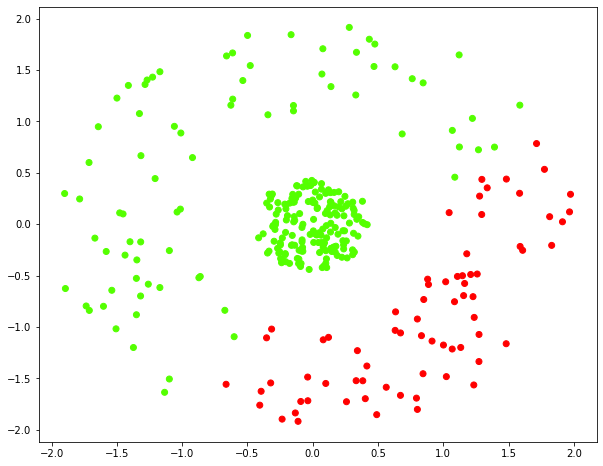

In [14]:
from sklearn import cluster
cluster = cluster.KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001)
cluster_kmean = cluster.fit_predict(ring)
plt.figure(figsize=(10, 8))
plt.scatter(ring[:,0], ring[:,1], c=cluster_kmean, cmap='prism')  # plot points with cluster dependent colors
plt.show()



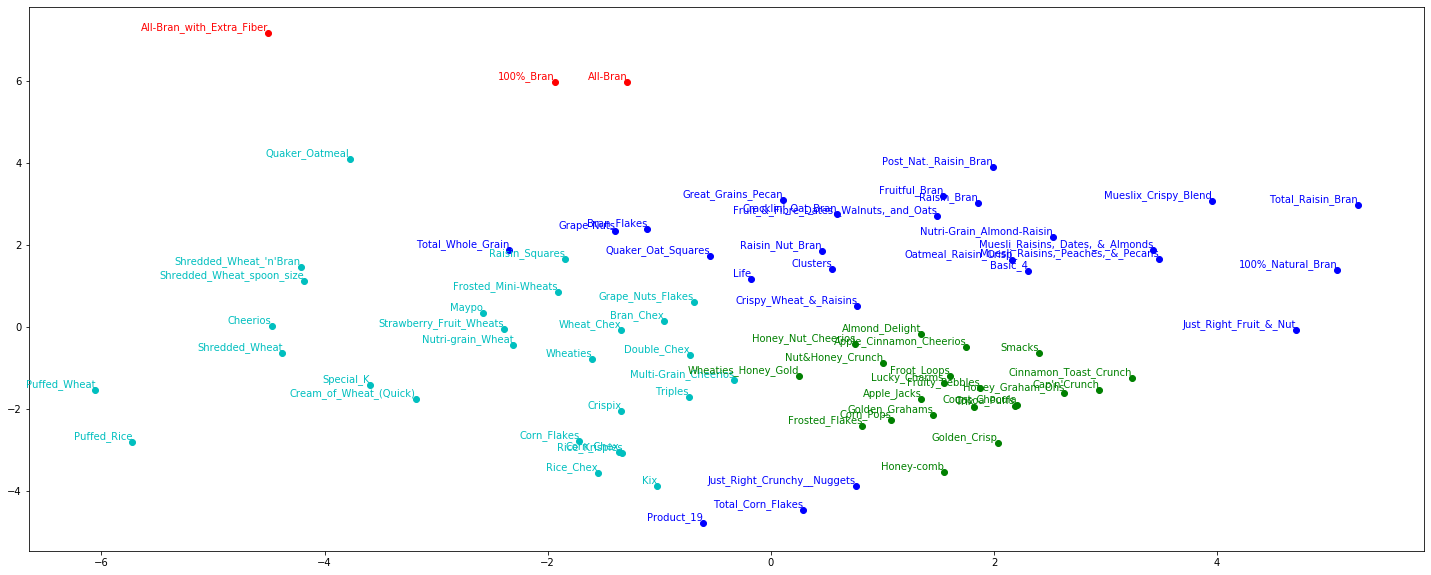

In [15]:
from sklearn import cluster
cluster = cluster.KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001)
cluster_kmean = cluster.fit_predict(cereal2)

colors = np.array([x for x in 'bgrcmyk'])
color = colors[cluster_kmean]

plt.figure(figsize=(25, 10))

#scatter plot
for x, y, c in zip(cereal_mds2[:,0], cereal_mds2[:,1], color):
    plt.scatter(x,y,color=c)
#labels
for label, x, y, c in zip(names, cereal_mds2[:,0],cereal_mds2[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

- Convergence: the sum of square distances (SSD) to the cluster means never increases
    - Assignment Step: each data assigned to a closest center, thus $\|x-c_i\|$ has to decrease, so is the SSD
    - Update Step: $\mu_i=$ min least square, so SSD decreases
- Hence the process will converge to local mininum. But local minimum can be quite bad (see fig).
<img width="400px" src="http://fengmai.net/download/data/bia652/images/cluster_localmin.png" style="float: right; width: 40%"></img>
- Initialization is important


- How best to initialize? Many suggestions.
- k-means++: find the $k$ centers that spread apart
 - Choose one center uniformly at random from among the data points.
 - For each data point $x$, compute $\min_{c\in C} d(x, c)$ among all chosen centers $c$
 - Choose a $x$ as the center with probablity proportional to $\min_{c\in C} d(x, c)$
 - Repeat till $k$ centers have been chosen.
- k-means++ algorithm guarantees an approximation ratio O(log k) in expectation over the global optimum

- How best to pick $k$?
    - the sum of square distances usually go down as $k$ increases
    - when $k = n$, it becomes zero!
    - Can look at how it changes with $k$, and pick $k$ where the sum of square distances change slows

## Distribution-based clustering: Gaussian mixture
- Assume that we have two types of 1D nodes generated using the following rules
    - The probablity of red node is p(r), we throw a coin with p=p(r) to decide if it is red, else black
    - if the node is red, generate using $N(\mu_r, \sigma^2_r)$, else generate black node with $N(\mu_b, \sigma^2_b)$
    - Suppose we observe these red/black nodes. Can we decide the two distributions?
- The answer is simple: just get sample mean/variance for each color.

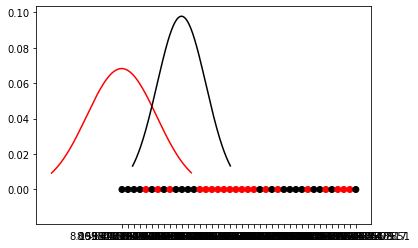

In [24]:
from scipy import stats

p = 0.3; n = 40;
np.random.seed(123)
def dice():
    if np.random.binomial(2, p) == 0:
        return ['r', np.random.normal(0,2,1)[0]]
    else: 
        return ['black', np.random.normal(10,2,1)[0]]
[color, x] = np.transpose([dice() for i in range(n)])
x_1d = x.astype(np.float)
plt.scatter(x, [0 for i in range(x.shape[0])], color = color)
red = x_1d[color=='r']; black = x_1d[color=='black']
mu_red = np.mean(red); mu_black = np.mean(black);
sigma_red = np.var(red, ddof=1); sigma_black = np.var(black, ddof=1)
xrange = np.arange(mu_red - 2*sigma_red, mu_red + 2*sigma_red, 0.1)
plt.plot(xrange, stats.norm.pdf(xrange, mu_red, sigma_red), color='r')
xrange = np.arange(mu_black - 2*sigma_black, mu_black + 2*sigma_black, 0.1)
plt.plot(xrange, stats.norm.pdf(xrange,mu_black,sigma_black), color='black')

- But suppose we are just given a list of 1D points generated with 2 Gaussian mixture
- how to we recover the membership? Which is red/black?

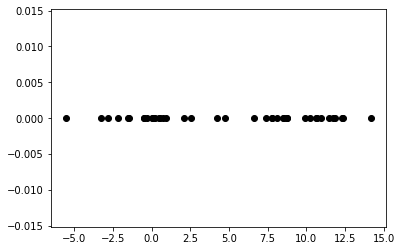

In [25]:

plt.scatter(x_1d, [0 for i in range(x.shape[0])], color = 'black');

- Let's assume the two gaussians are red: N(0,1) and black: N(2,1); also assume 1/2 red/black

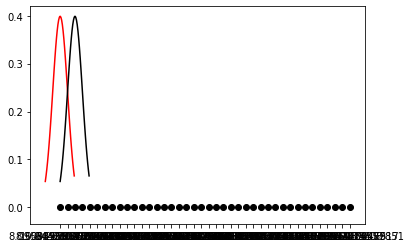

In [26]:
plt.scatter(x, [0 for i in range(x.shape[0])], color = 'black')
mu_red = 0; sigma_red = 1; mu_black = 2; sigma_black = 1; 
xrange = np.arange(mu_red - 2*sigma_red, mu_red + 2*sigma_red, 0.1)
plt.plot(xrange, stats.norm.pdf(xrange, mu_red, sigma_red), color='r')
xrange = np.arange(mu_black - 2*sigma_black, mu_black + 2*sigma_black, 0.1)
plt.plot(xrange, stats.norm.pdf(xrange,mu_black,sigma_black), color='black')

### Gaussian mixture clustering algorithm
- 1) Give an initial guess of $\mu_j$ and $\sigma_j$ for each of the $k$ clusters $c_j$, as well as proporation of items in each cluster, $p(c_j)$
- 2) Compute the probability of each data point belonging to each of the $k$ clusters $c_j$
$$p(c_j|x_i) = \frac{p(x_i|c_j) p(c_j)}{\sum_{l=1}^k p(x_i|c_l) p(c_l)}$$
 Here (note that here we are using the density function as if it is a probability mass function for discrete random variables)
$$p(x_i|c_l) = \frac{1}{\sqrt{2\sigma_l^2\pi}}e^{-\frac{(x_i-\mu_l)^2}{2\sigma_l^2}}$$. 

- 3) Re-estimate mean, std
 $$\mu_j = \frac{\sum_{i=1}^n p(c_j|x_i) x_i}{\sum_{i=1}^n p(c_j|x_i)},\ \sigma_j = \frac{\sum_{i=1}^n p(c_j|x_i) (x_i - \mu_j)^2}{\sum_{i=1}^n p(c_j|x_i)}$$
- 4) Estimate the number of points in each cluster
$$\text{#points in cluster }j = \sum_{i=1}^n p(x_i|c_j)$$
Probability any random data point belongs to cluster $j$ is
$$p(c_j) = \frac{\sum_{i=1}^n p(x_i|c_j)}{n}$$
- 5) Repeat from 2. till the mean and std of the clusters stop changing

- For multidimensional data, $x_i$, $\mu_j$ are vectors, $\Sigma_j$ is a covariance matrix
- Estimation becomes 
$$\Sigma_j = \frac{\sum_{i=1}^n p(c_j|x_i) (x_i - \mu_j)(x_i - \mu_j)^T}{\sum_{i=1}^n p(c_j|x_i)}$$
- 
$$p(x_i|c_l) = \frac{1}{\sqrt{(2\pi)^k|\Sigma_l|^2}}e^{-\frac{1}{2} (x-\mu_l)^T\Sigma_j(x-\mu_l)}$$. 


- Using Python package

In [27]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=2, random_state=123)
x_2d = np.transpose([x_1d])
gmm.fit(x_2d)
p_red = gmm.predict_proba(x_2d)[:,0]
p_red

array([9.98105415e-01, 9.99148996e-01, 9.99985134e-01, 9.99939759e-01,
       1.59868090e-08, 9.96442538e-01, 1.33011331e-05, 9.99476783e-01,
       4.40646172e-05, 9.92600269e-01, 9.99991273e-01, 9.99996642e-01,
       9.96618092e-01, 4.21707802e-08, 8.74825399e-07, 7.28153550e-05,
       7.58570765e-11, 8.87052853e-06, 3.80519402e-01, 2.93865921e-05,
       2.35184461e-03, 8.57543723e-06, 2.67201528e-05, 9.99985955e-01,
       1.29212505e-04, 9.99999344e-01, 9.90566540e-07, 9.64730994e-01,
       9.99999973e-01, 9.99969290e-01, 9.99998315e-01, 1.96246085e-04,
       9.99204288e-01, 9.99494338e-01, 8.92277730e-05, 9.99998008e-01,
       6.21612713e-03, 1.76986749e-01, 1.94646479e-07, 9.99999318e-01])

- The code returns the probability of each data point belonging to each cluster. Here to plot the 1D points, and the probability each point belongs to one of the cluster

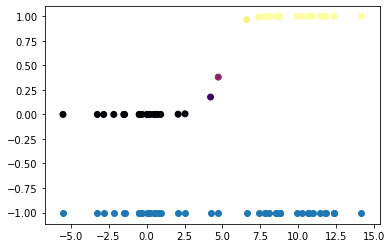

In [28]:
plt.scatter(x_1d, [-1 for i in range(x_1d.shape[0])]);
plt.scatter(x_1d, p_red, c=p_red, cmap='inferno');

- One can use to generate overlapping clusters (i.e, a point may be p=0.6 in cluster 1 and p=0.4 in cluster 2)
- Or use thresholding to do hard non-overlapping clustering

- Let's apply to the ring example: unfortunately Gaussian Mixture clustering assume ellipsoid shaped clusters, does not work well for the ring shape cluster

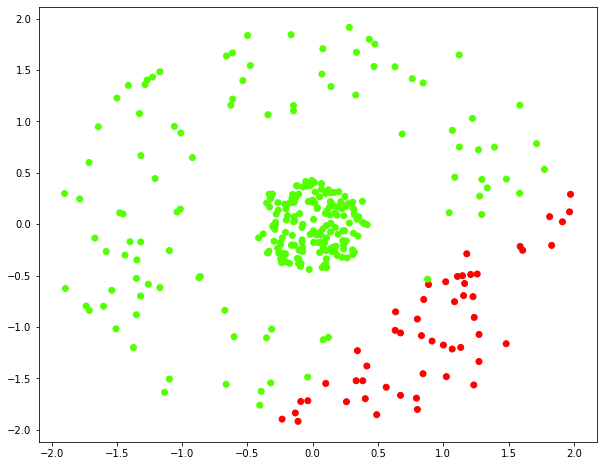

In [29]:
gmm.fit(ring)
cluster_gmm = gmm.predict(ring)
plt.figure(figsize=(10, 8))
plt.scatter(ring[:,0], ring[:,1], c=cluster_gmm, cmap='prism')  # plot points with cluster dependent colors
plt.show()

- To cereal data

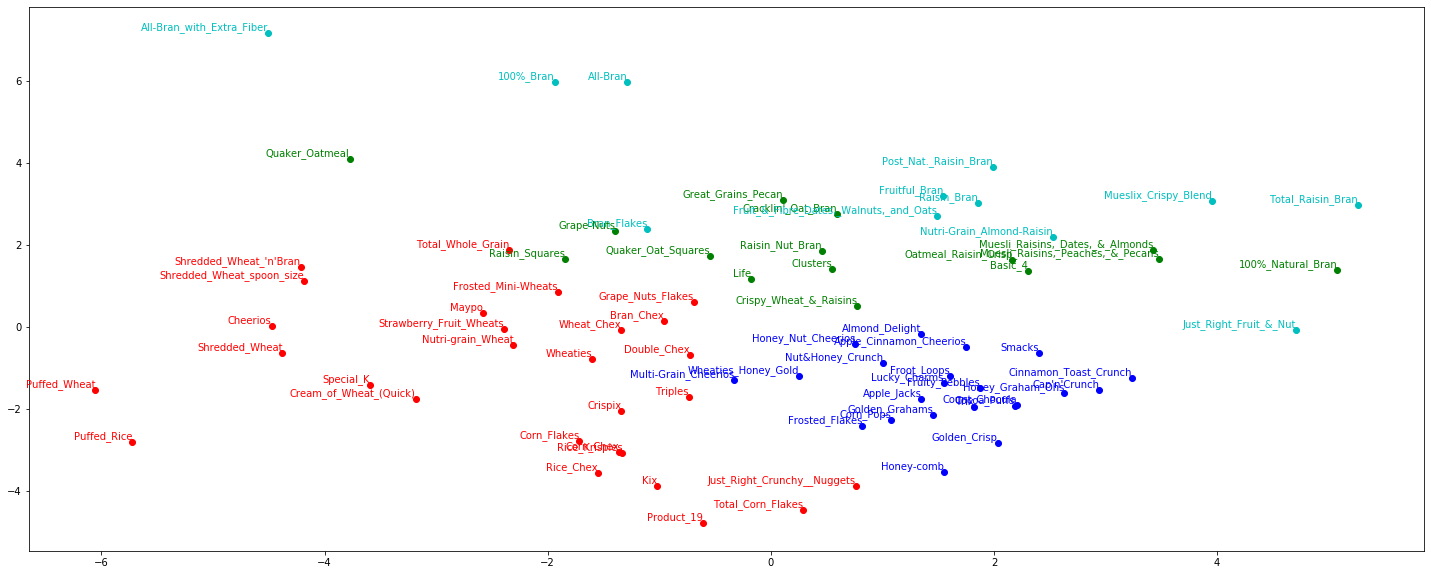

In [30]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4, random_state=123)
gmm.fit(cereal2)
cluster_gmm = gmm.predict(cereal2)
colors = np.array([x for x in 'bgrcmyk'])
color = colors[cluster_gmm]
plt.figure(figsize=(25, 10))
#scatter plot
for x, y, c in zip(cereal_mds2[:,0], cereal_mds2[:,1], color):
    plt.scatter(x,y,color=c)
#labels
for label, x, y, c in zip(names, cereal_mds2[:,0],cereal_mds2[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

## Density-based clustering: DBSCAN

- This is a density based method
- It does not require the user to specify $k$ - the number of clusters
- The basic idea is to start from a point with sufficient number of neighbors (called a core point), and keep growing by including all the $\epsilon$-neighbors, and the neighbors of the core neighbors. 
- Take only two parameters: $\epsilon$ and $t$ (min number of neighbors), and a distance measure $d$.

- Let $X$ be the set of $n$ data points.
- Let $N(x,\epsilon)$ be the data items within a radius of $\epsilon$ from $x$
$$N(x,\epsilon) = \{y| d(x,y) \le \epsilon,\ y \in X\}$$
- $|N(x,\epsilon)|$ is the number of neighbors
- If $N(x, \epsilon) \ge t$, $x$ is called a core point, else it is called a bounary point.
- DBSCAN iteratively connects two core points if they can be reached through another point within the radius.
- DBSCAN allow points to be noise (not in any cluster)

- Using Python sklearn

In [ ]:
from sklearn import cluster
# try 0.4, 0.3, ...
dbscan = cluster.DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
cluster_dbscan = dbscan.fit_predict(ring)
plt.figure(figsize=(10, 8))
plt.scatter(ring[:,0], ring[:,1], c=cluster_dbscan, cmap='prism');  # plot points with cluster dependent colors

- On cereal data: has to be careful with $\epsilon$, also misses the "Bran" cluster at the top

In [ ]:
from sklearn import cluster
# have to adjust eps carefully to get reasonable clusters
dbscan = cluster.DBSCAN(eps=2, min_samples=5, metric='euclidean')
cluster_dbscan = dbscan.fit_predict(cereal2)
colors = np.array([x for x in 'bgrcmyk'])
color = colors[cluster_dbscan]
plt.figure(figsize=(25, 10))

#scatter plot
for x, y, c in zip(cereal_mds2[:,0], cereal_mds2[:,1], color):
    plt.scatter(x,y,color=c)
#labels
for label, x, y, c in zip(names, cereal_mds2[:,0],cereal_mds2[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

- Advantage: fast ($O(n log(n))$ operations using quad-tree; no need to specify $k$
- Disadvantage: sensitive to $\epsilon$ and distance measure


In [ ]:
twoball = pd.read_csv("http://fengmai.net/download/data/bia652/images/cluster_dbscan_prob.csv", header=None).values
from sklearn import cluster
dbscan = cluster.DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
cluster_dbscan = dbscan.fit_predict(twoball)
plt.figure(figsize=(8, 4))
plt.scatter(twoball[:,0], twoball[:,1], c=cluster_dbscan, cmap='prism');  # plot points with cluster dependent colors

## Hierarchical clustering/divisive method
<img src="http://fengmai.net/download/data/bia652/images/cluster_divisive.png" width="300px"></img>

### spectral clustering for graphs
- To explain spectral clustering, we first have to talk about **graph clustering**
- Consider a connected graph of vertices $V$ and edges $E$. There are $|V|$ vertices and $|E|$ edges.
- Each edge $\{i,j\}$ has a weight $w_{ij}$
- The sum of weights for each node $i$ is denoted as $d_i = \sum_{j\in V,\ j\ne i} w_{ij}$.

- We want to partition nodes of a graph into clusters so that the sum of edge weights within cluster is large, and sum of edge weights between clusters is small
- Spectral clustering is one way to cluster graphs

- Suppose we partitioned vertices into two clusters $A$ (red) and $B$ (blue)
- We want to minimize the **cut**: the sum of $w_{ij}$ with $i\in A$ and $j \in B$.
<img width="700px" src="http://fengmai.net/download/data/bia652/images/cluster_spectral.png"></img>

- But the best solution is $1$ for all elements of $x$!
- So we have to make sure the two clusters are balanced

- We define normalized cut:
$$\text{Ncut}(A, B) = \frac{\text{cut}(A, B)}{\text{vol}(A)} + \frac{\text{cut}(B, A)}{\text{vol}(B)}$$
- Here $\text{vol}(A)$ is the sum of weights of all edges with one end in $A$.
$$\text{vol}(A) = \sum_{i\in A} d_i,\ \text{vol}(B) =  \sum_{i\in B} d_i$$
- This makes sure that $vol(A)$ and $vol(B)$ are not too small, otherwise $\text{Ncut}(A, B)$ would be large.

### Spectral Clustering for multidimensional data
- To apply spectral clustering to multidimensional data, we need to establish a similarity graph
- Possibilities: nearest neighbor graph; or similarity graph via Gaussian kernel
- For example, similarity between two multidimensional vectors $i$ and $j$ is
$$e^{-\frac{\|x_i-x_j\|}{2\sigma_i^2}}$$

- This is known as the Gaussian kernel similarity function
- Here $\sigma$ controls the size of the neighborhood
- Example: similarity graph (with cut off threshold similarity = 0.1) for different $\sigma$
<img src="http://fengmai.net/download/data/bia652/images/cluster_spectral_gaussian.png" width="600px"></img>

- Using Python package

In [ ]:
#import data
ring = pd.read_csv("http://fengmai.net/download/data/bia652/images/clustering_example1.csv",header=None).values
plt.scatter(ring[:,0], ring[:,1])

In [ ]:
from sklearn import cluster
#Using nearest neighbor for similarity graph
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
clu = spectral.fit_predict(ring)
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(ring[:,0], ring[:,1], color=colors[clu])


In [ ]:
#Using Gaussian kernel we define ourselves
sigma=0.2
def sim(x, y):
    return np.exp(-((x[0]-y[0])**2+(x[1]-y[1])**2)/(2.*sigma**2))
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity=sim)
clu = spectral.fit_predict(ring)
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(ring[:,0], ring[:,1], color=colors[clu])

### Apply spectral clustering to cereal data

In [ ]:
cereal = pd.read_csv("http://fengmai.net/download/data/bia652/images/cereal.csv", sep=" ")
names = cereal["name"].values
cereal = cereal.drop(["name","mfr","type"],1)
cereal[:6] # we can see that there are missing values! (-1)

- We replace missing values with the mean

In [ ]:
for vals in cereal.columns:
    c = cereal[vals]
    avg = np.mean(c[c != -1])
    cereal[vals] = c.replace(-1, avg)

- Spectral clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
cereal2 = StandardScaler(with_std=True).fit_transform(cereal) #standardize

from sklearn import cluster
#Using nearest neighbor for similarity graph
spectral = cluster.SpectralClustering(n_clusters=4, eigen_solver='arpack', affinity="nearest_neighbors")
clu = spectral.fit_predict(cereal2)
np.transpose([names, clu])

- Visualize

In [ ]:
from sklearn import manifold
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=123,
                   dissimilarity="euclidean", n_jobs=1)
cereal_mds2 = mds.fit(cereal2).embedding_

# colors
colors = np.array([x for x in 'bgrcmyk'])
color = colors[clu]

plt.figure(figsize=(25, 10))

#scatter plot
for x, y, c in zip(cereal_mds2[:,0], cereal_mds2[:,1], color):
    plt.scatter(x,y,color=c)
#labels
for label, x, y, c in zip(names, cereal_mds2[:,0],cereal_mds2[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)